## Lab Assignment 4

Feature scaling was first discussed within one of the PCA lab assignments, but this lab will really familiarize you with it. You will be making use of the Wholesale Customer's dataset, hosted by UCI's Machine Learning. Unsupervised clustering scans your features and then groups your samples based off of them. Therefore you should have a solid understanding of what each of your features are, which one's you should remove, and how to scale them in order for the 'blind' clustering to preform correctly and do what you want it to do.

1. Visit the UCI dataset page and read all the content available, so you become accustomed to the dataset. Then, load up the starter code from Module5/assignment4.py and as usual, read through that it in its entirety as well.
2. The first thing that needs to be answered is, what is it you'd like to accomplish by clustering this dataset? There are a couple of potential questions you could ask given the data, and the one you choose will drive how you manipulate your dataset. Are you interested in which products people buy together, so that you can place them near one another in your store, or recommend the pair product when shopping online? Perhaps you're more interested in which products people are spending the most money on? Or maybe your interest just lies in identifying what individual products people are buying. All of this must be considered.
3. For the purposes of this lab, you'll assume you're interested in overall customer behavior rather than channel or region specific behavior, so you'll drop those two fields from the dataset. If you were a large wholesaler with branches all over the nation, you'd want to keep those fields in so that you can duplicate the process outlined in the assignment to particular areas and vertical markets.
4. Complete the assignment and answer the questions below.

In [29]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib

In [6]:
def drawVectors(transformed_features, components_, columns, plt):
    num_columns = len(columns)

    # This function will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## Visualize projections

    # Sort each column by its length. These are your *original*
    # columns, not the principal components.
    import math
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Projected Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75, zorder=600000)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75, zorder=600000)
    return ax

In [7]:
def doPCA(data, dimensions=2):
    from sklearn.decomposition import RandomizedPCA
    model = RandomizedPCA(n_components=dimensions)
    model.fit(data)
    return model

In [9]:
def doKMeans(data, clusters=0):
    #
    # TODO: Do the KMeans clustering here, passing in the # of clusters parameter
    # and fit it against your data. Then, return a tuple containing the cluster
    # centers and the labels
    #
    # .. your code here ..
    
    model = KMeans(n_clusters=clusters)
    model.fit(data)
    
    return model.cluster_centers_, model.labels_

In [12]:
#
# TODO: Load up the dataset. It has may or may not have nans in it. Make
# sure you catch them and destroy them, by setting them to '0'. This is valid
# for this dataset, since if the value is missing, you can assume no $ was spent
# on it.
#
# .. your code here ..

dataFile = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module5Clustering\Datasets\Wholesale customers data.csv'
df = pd.read_csv(dataFile); 
df.fillna(0, inplace=True)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [15]:
#
# TODO: As instructed, get rid of the 'Channel' and 'Region' columns, since
# you'll be investigating as if this were a single location wholesaler, rather
# than a national / international one. Leaving these fields in here would cause
# KMeans to examine and give weight to them.
#
# .. your code here ..

df.drop(['Channel','Region'],axis = 1, inplace=True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [18]:
#
# TODO: Before unitizing / standardizing / normalizing your data in preparation for
# K-Means, it's a good idea to get a quick peek at it. You can do this using the
# .describe() method, or even by using the built-in pandas df.plot.hist()
#
# .. your code here ..
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


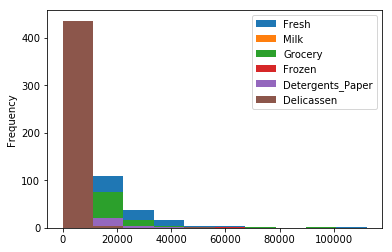

In [22]:
df.plot.hist()
plt.show()

In [26]:
#
# INFO: Having checked out your data, you may have noticed there's a pretty big gap
# between the top customers in each feature category and the rest. Some feature
# scaling algos won't get rid of outliers for you, so it's a good idea to handle that
# manually---particularly if your goal is NOT to determine the top customers. After
# all, you can do that with a simple Pandas .sort_values() and not a machine
# learning clustering algorithm. From a business perspective, you're probably more
# interested in clustering your +/- 2 standard deviation customers, rather than the
# creme dela creme, or bottom of the barrel'ers
#
# Remove top 5 and bottom 5 samples for each column:
drop = {}
for col in df.columns:
    # Bottom 5
    sort = df.sort_values(by=col, ascending=True)
    if len(sort) > 5: sort=sort[:5]
    for index in sort.index: drop[index] = True # Just store the index once

    # Top 5
    sort = df.sort_values(by=col, ascending=False)
    if len(sort) > 5: sort=sort[:5]
    for index in sort.index: drop[index] = True # Just store the index once

#
# INFO Drop rows by index. We do this all at once in case there is a
# collision. This way, we don't end up dropping more rows than we have
# to, if there is a single row that satisfies the drop for multiple columns.
# Since there are 6 rows, if we end up dropping < 5*6*2 = 60 rows, that means
# there indeed were collisions.
print("Dropping {0} Outliers...".format(len(drop)))
df.drop(inplace=True, labels=drop.keys(), axis=0)
print(df.describe())

Dropping 42 Outliers...
              Fresh          Milk       Grocery        Frozen  \
count    398.000000    398.000000    398.000000    398.000000   
mean   10996.231156   5144.090452   7091.711055   2639.721106   
std     9933.042596   5057.406574   6923.019293   2974.246906   
min       37.000000    258.000000    314.000000     47.000000   
25%     3324.500000   1571.250000   2155.500000    749.750000   
50%     8257.500000   3607.500000   4573.000000   1526.000000   
75%    15828.500000   6953.250000   9922.250000   3370.250000   
max    53205.000000  29892.000000  39694.000000  17866.000000   

       Detergents_Paper   Delicassen  
count        398.000000   398.000000  
mean        2562.974874  1278.736181  
std         3608.176776  1220.745297  
min           10.000000    11.000000  
25%          273.250000   409.500000  
50%          812.000000   946.500000  
75%         3841.500000  1752.250000  
max        19410.000000  7844.000000  


INFO: What are you interested in?

Depending on what you're interested in, you might take a different approach
to normalizing/standardizing your data.

You should note that all columns left in the dataset are of the same unit.
You might ask yourself, do I even need to normalize / standardize the data?
The answer depends on what you're trying to accomplish. For instance, although
all the units are the same (generic money unit), the price per item in your
store isn't. There may be some cheap items and some expensive one. If your goal
is to find out what items people buy tend to buy together but you didn't 
unitize properly before running kMeans, the contribution of the lesser priced
item would be dwarfed by the more expensive item.

For a great overview on a few of the normalization methods supported in SKLearn,
please check out: https://stackoverflow.com/questions/30918781/right-function-for-normalizing-input-of-sklearn-svm

Suffice to say, at the end of the day, you're going to have to know what question
you want answered and what data you have available in order to select the best
method for your purpose. Luckily, SKLearn's interfaces are easy to switch out
so in the mean time, you can experiment with all of them and see how they alter
your results.


5-sec summary before you dive deeper online:

- **NORMALIZATION**: Let's say your user spend a LOT. Normalization divides each item by the average overall amount of spending. Stated differently, your new feature is = the contribution of overall spending going into that particular item: $spent on feature / \$overall spent by sample


- **MINMAX**:        What % in the overall range of \$ spent by all users on THIS particular feature is the current sample's feature at? When you're dealing with all the same units, this will produce a near face-value amount. Be careful though: if you have even a single outlier, it can cause all your data to get squashed up in lower percentages. Imagine your buyers usually spend \$100 on wholesale milk, but today only spent $20. This is the relationship you're trying to capture with MinMax. NOTE: MinMax doesn't standardize (std. dev.); it only normalizes / unitizes your feature, in the mathematical sense. MinMax can be used as an alternative to zero mean, unit variance scaling.

    [(sampleFeatureValue-min) / (max-min)] * (max-min) + min 
    
    Where min and max are for the overall feature values for all samples.


centroid #0 : [ 0.46351402 -0.39754553 -0.53033284  1.64680726 -0.54692084  0.13425774
  1.37053597]
centroid #1 : [-0.61478679  1.23898586  1.40192503 -0.32151215  1.42020738  0.40385315
 -1.05758507]
centroid #2 : [ 0.10059762 -0.37157268 -0.3951066  -0.3892944  -0.3972158  -0.2041343
 -0.00730049]
Projected Features by importance:
 [(3.754807276773855, 'Grocery'), (3.657055895365392, 'Detergents_Paper'), (3.612993220067443, 'Milk'), (3.3685958944005328, 'label'), (2.9060854050906886, 'Frozen'), (2.598256618942778, 'Delicassen'), (2.412011422762153, 'Fresh')]
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  label
0  12669  9656     7561     214              2674        1338      2
1   7057  9810     9568    1762              3293        1776      1
2   6353  8808     7684    2405              3516        7844      1
3  13265  1196     4221    6404               507        1788      0
4  22615  5410     7198    3915              1777        5185      0


C:\Users\ng35019\Software\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


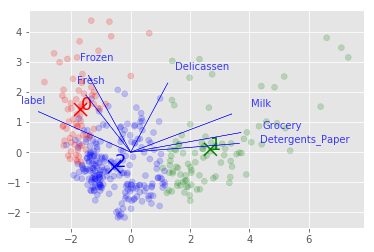

In [77]:
#
# TODO: Un-comment just ***ONE*** of lines at a time and see how alters your results
# Pay attention to the direction of the arrows, as well as their LENGTHS
#T = preprocessing.StandardScaler().fit_transform(df)
#T = preprocessing.MinMaxScaler().fit_transform(df)
#T = preprocessing.normalize(df)
T = preprocessing.scale(df)
#T = df # No Change

#
# INFO: Sometimes people perform PCA before doing KMeans, so that KMeans only
# operates on the most meaningful features. In our case, there are so few features
# that doing PCA ahead of time isn't really necessary, and you can do KMeans in
# feature space. But keep in mind you have the option to transform your data to
# bring down its dimensionality. If you take that route, then your Clusters will
# already be in PCA-transformed feature space, and you won't have to project them
# again for visualization.

# Do KMeans
n_clusters = 3
centroids, labels = doKMeans(T, n_clusters)
#
# TODO: Print out your centroids. They're currently in feature-space, which
# is good. Print them out before you transform them into PCA space for viewing
#
# .. your code here ..
print('\n'.join('centroid #{} : {}'.format(i,c) for i,c in enumerate(centroids)))   

# Do PCA *after* to visualize the results. Project the centroids as well as 
# the samples into the new 2D feature space for visualization purposes.
display_pca = doPCA(T)
T = display_pca.transform(T)
CC = display_pca.transform(centroids)

# TODO: Parameters to play around with
PLOT_TYPE_TEXT = False    # If you'd like to see indices
PLOT_VECTORS = True       # If you'd like to see your original features in P.C.-Space

matplotlib.style.use('ggplot') # Look Pretty
c = ['red', 'green', 'blue', 'orange', 'yellow', 'brown']

# Visualize all the samples. Give them the color of their cluster label
fig = plt.figure()
ax = fig.add_subplot(111)
if PLOT_TYPE_TEXT:
    # Plot the index of the sample, so you can further investigate it in your dset
    for i in range(len(T)): ax.text(T[i,0], T[i,1], df.index[i], color=c[labels[i]], alpha=0.75, zorder=600000)
    ax.set_xlim(min(T[:,0])*1.2, max(T[:,0])*1.2)
    ax.set_ylim(min(T[:,1])*1.2, max(T[:,1])*1.2)
else:
    # Plot a regular scatter plot
    sample_colors = [ c[labels[i]] for i in range(len(T)) ]
    ax.scatter(T[:, 0], T[:, 1], c=sample_colors, marker='o', alpha=0.2)


# Plot the Centroids as X's, and label them
ax.scatter(CC[:, 0], CC[:, 1], marker='x', s=169, linewidths=3, zorder=1000, c=c)
for i in range(len(centroids)): ax.text(CC[i, 0], CC[i, 1], str(i), zorder=500010, fontsize=18, color=c[i])


# Display feature vectors for investigation:
if PLOT_VECTORS: drawVectors(T, display_pca.components_, df.columns, plt)

# Add the cluster label back into the dataframe and display it:
df['label'] = pd.Series(labels, index=df.index)
print(df.head())

plt.show()